# 2.4: Polynomial Regression (poly_example)

In this tutorial, we will train a simple polynomial regression model to fit a simple 1-variable data and select appropriate polynomdel degree for fitting.

Portion of content for this tutorial is taken from Python Data Science Handbook by Jake VanderPlas

## Importing the libraries

In [1]:
!pip install pandas-profiling
!pip install ipywidgets

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set() 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

## Importing the dataset

In [3]:
# df = pd.read_csv('./data/poly_example.csv')
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1_VLG-QVuEQFaABcsXxWmG1ASV-SVcEoEvoFDH8pUN4A/gviz/tq?tqx=out:csv&sheet=poly_example')

In [4]:
df.head()

,Feature 1,Target
0,1.739070e-01,2.145352
1,5.188670e-01,8.185920
2,1.310000e-08,-15.270300
3,9.140500e-02,0.444955
4,2.153700e-02,-8.464880


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  80 non-null     float64
 1   Target     80 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB


In [6]:
from ydata_profiling import ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
#Exercise: Selecting X and y to be appropriate feature/target
X = df[["Feature 1"]] 
y = df["Target"]

## Visualization the dataset

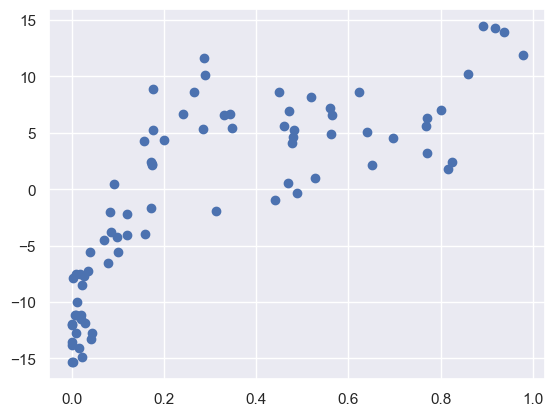

In [8]:
plt.scatter(X, y)

The data is definitely not linear, potentially good for polynomial fitting

## Splitting the dataset into the Training set and Test set

We will be using 70-30 split for this case 

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Polynomial Features

PolynomialFeature() can be used to transform data into multiple features of the specified degree

In [10]:
#Task: Explore and see what happens when we change the number
p5 = PolynomialFeatures(degree=5)
X_5 = p5.fit_transform(X_train)

In [11]:
X_train.head()

,Feature 1
34,0.478694
62,0.482192
42,0.078649
54,0.241644
16,0.174143


In [12]:
#put in data frame to make it easily readable
# 1 x x^2 x^3 x^4 x^5
pd.DataFrame(X_5).head()

,0,1,2,3,4,5
0,1.0,0.478694,0.229148,0.109692,0.052509,0.025136
1,1.0,0.482192,0.232509,0.112114,0.054060,0.026068
2,1.0,0.078649,0.006186,0.000486,0.000038,0.000003
3,1.0,0.241644,0.058392,0.014110,0.003410,0.000824
4,1.0,0.174143,0.030326,0.005281,0.000920,0.000160


## Visualizing polynomial fits of multiple degrees

The key question here is what degree of polynomial is appropriate? Visualization maybe a good tools to see that.

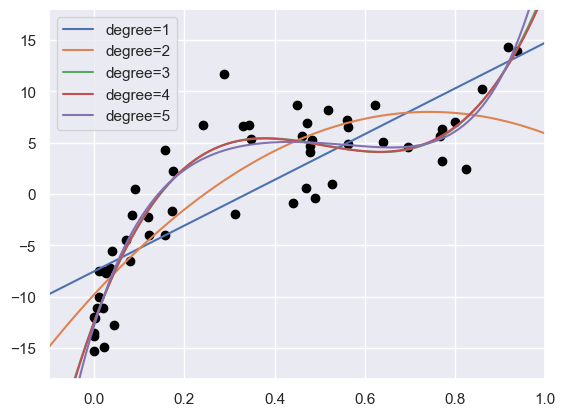

In [13]:
# Create a range of x value for plotting
X_plot = np.linspace(-0.1, 5, 500)[:, None]

#plot the data
plt.scatter(X_train["Feature 1"], y_train, color='black')

#plotting polynomial
axis = plt.axis()
for deg in range(1,6):# Trying degree 1 - 5
    #changing polynomial to the degree we want
    pf = PolynomialFeatures(degree=deg)
    X_p = pf.fit_transform(X_train)
    #fitting it to regression
    lr = LinearRegression()
    lr.fit(X_p, y_train)
    #plotting functions 
    y_plot = lr.predict(pf.fit_transform(X_plot))
    plt.plot(X_plot.ravel(), y_plot, label='degree={0}'.format(deg))
plt.xlim(-0.1, 1.0);
plt.ylim(-18, 18);
plt.legend(loc='best');

## Visualize the validation curve

Scikit-learn provide a tools that compute training + validation score when varying parameters.

We can use this to see what happens when we vary the degree of polynomial

**The code in this section is taken from Python Data Science Handbook**

In [14]:
#making a pipeline to chain the polynomial feature transformation and linear regression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

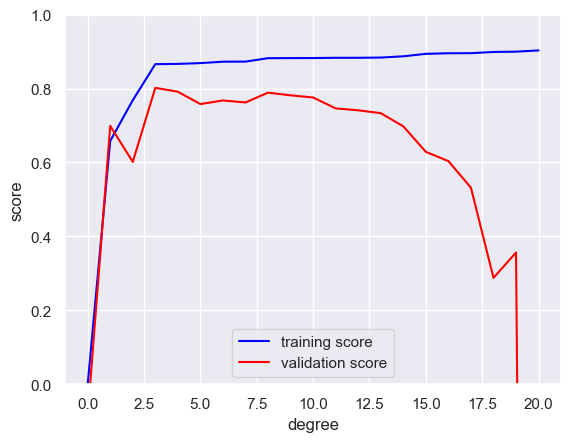

In [15]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X_train, y_train,
                                          param_name='polynomialfeatures__degree', param_range=degree, cv=8)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

We see that polynomial around the degree of 3 is probably the most appropriate

## Predicting the test data

In [16]:
#fit the model to polynomial of degree 3
pf = PolynomialFeatures(3)
X_p = pf.fit_transform(X_train)
lr = LinearRegression()
lr.fit(X_p, y_train)

LinearRegression()

In [17]:
#predicint the test result
y_pred = lr.predict(pf.fit_transform(X_test))

## Evaluate the performance

In [18]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred) #not bad

0.854491231185897

In [19]:
#studying the fit of the training data
y_pred_train = lr.predict(X_p)
r2_score(y_train, y_pred_train) 

0.8623217015870259

The model seems to generalize quite ok.

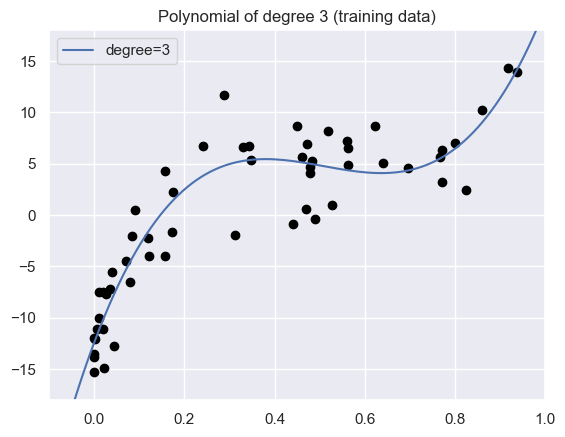

In [20]:
# Create a range of x value for plotting
X_plot = np.linspace(-0.1, 5, 500)[:, None]

#plot the data
plt.scatter(X_train["Feature 1"], y_train, color='black')

#plotting polynomial
axis = plt.axis()
y_plot = lr.predict(pf.fit_transform(X_plot))
plt.plot(X_plot.ravel(), y_plot, label='degree={0}'.format(3))
plt.xlim(-0.1, 1.0);
plt.ylim(-18, 18);
plt.legend(loc='best');
plt.title("Polynomial of degree 3 (training data)");

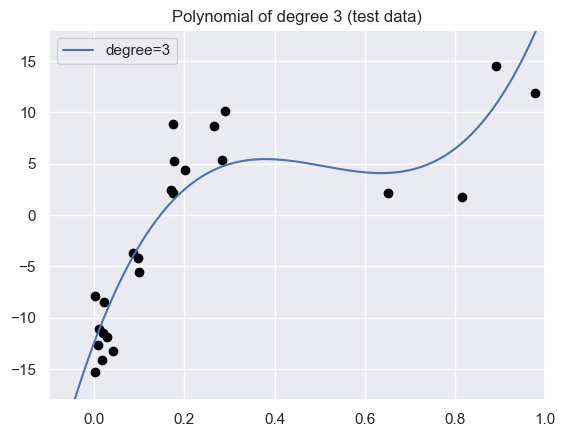

In [21]:
#plot the data
plt.scatter(X_test["Feature 1"], y_test, color='black')

#plotting polynomial
axis = plt.axis()
y_plot = lr.predict(pf.fit_transform(X_plot))
plt.plot(X_plot.ravel(), y_plot, label='degree={0}'.format(3))
plt.xlim(-0.1, 1.0);
plt.ylim(-18, 18);
plt.legend(loc='best');
plt.title("Polynomial of degree 3 (test data)");

## TODO: What if the polynomial degree is too high?

In [22]:
#fit the model to polynomial of degree 12
pf12 = PolynomialFeatures(12)

In [23]:
#predict the test result

In [24]:
#check the r2_score
from sklearn.metrics import r2_score

In [25]:
#studying the fit of the training data

In [26]:
# Create a range of x value for plotting

We see that this shape of curve will probably not generalize well with test data

In [27]:
#plot the data